# Hangman

In [63]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
class Hangman(object):
    
    def __init__(self, 
                 list_of_words: List[str],
                 word_len: int = 6,
                 trials: int = 8):
        self._idx = {}
        self.word_len, self.trials = word_len, trials
        self._update_index(list_of_words)
        self.selected_word = None
        self._select_word()
        self.mask = ['_'] * len(self.selected_word)
                
    def _update_index(self, list_of_words: List[str]):
        for word in list_of_words:
            try:
                self._idx[len(word)].append(word)
            except KeyError:
                self._idx[len(word)] = [word]
    
    def get_words(self, length: int):
        try:
            return self._idx[length]
        except KeyError:
            return []
        
    def add_words(self, list_of_words: List[str]):
        self._update_index(list_of_words)
        
    def print_status(self):
        print(self.mask)
        print('\nRemaining trials {}'.format(self.trials))
        
    def play(self, guess: str):
        self.trials -= 1
        for i, ch in enumerate(self.selected_word):
            if guess[i] == ch:
                self.mask[i] = ch
        return self.mask
         
    def _select_word(self):
        try:
            candidates = self._idx[self.word_len]
            self.selected_word = np.random.choice(candidates)
        except KeyError:
            print(
                'Non esistono parole di lunghezza {}'.format(
                self.word_len))

In [9]:
file_path = 'words/1000_parole_italiane.txt'
with open(file_path, 'r', encoding='utf-8') as fhandle:
    lines = fhandle.readlines()
words = [w.strip('\n') for w in lines]

# Implementazione player Hangman

In [10]:
from collections import defaultdict

In [66]:
class Player(object):
    
    def __init__(self, hangman : Hangman, list_of_words = List[str]):
        self.hangman = hangman
        char_index=defaultdict(lambda : 0)
        for word in list_of_words:
            for char in word:
                char_index[char] += 1
        self.char_frequency = [c for c, f in sorted(list(char_index.items()), key = lambda x : -x[1] )]
        self.char_to_try = 0
        self.positions_guessed = {}
    
    def trial(self):
        guess = self.char_frequency[self.char_to_try] * self.hangman.word_len
        mask = self.hangman.play(guess)
        self.char_to_try += 1
        for i, ch in enumerate(mask):
            if ch != '_' :
                self.positions_guessed [i] = ch
                
    def play(self):
        while True:
            self.trial()
            if '_' not in self.hangman.mask:
                return(self.hangman.mask)
                break
            elif self.hangman.trials <= 0:
                return(self.hangman.mask)
                break
            else:
                continue

# Implementazione SmartPlayer Hangman

In [73]:
class SmartPlayer(object):
    
    def __init__(self, hangman : Hangman, list_of_words = List[str]):
        
        self.hangman = hangman
        self.char_index=defaultdict(lambda : 0)
        self.list_of_words=list_of_words
        for word in self.list_of_words:
            for char in word:
                self.char_index[char] += 1
        self.char_frequency = [c for c, f in sorted(list(self.char_index.items()), key = lambda x : -x[1] )]
        self.char_to_try = 0
        self.positions_guessed = {}
        self.control_mask = ['_']*self.hangman.word_len
        self.mask=['_']*self.hangman.word_len
        self.controllo=[]
        
        
        
    def list_filter(self,mask):
        
        empty_mask = ['_']*len(self.hangman.mask)
        new_list_of_words = []
        new_list = []
        for word in self.list_of_words:
            if len(word) == len(self.hangman.mask):
                new_list_of_words.append(word)
        for word in new_list_of_words:
            mask_word = list(word)
            for i in range(len(mask)):
                if mask[i] == '_':
                    mask_word[i] = '_'
            if mask_word == mask:
                new_list.append(word)
        return new_list
                        
    
    
    def trial(self):      
        
        guess=self.char_frequency[self.char_to_try]*self.hangman.word_len
        self.controllo.append(self.char_frequency[self.char_to_try])
        mask = self.hangman.play(guess)
        if self.char_frequency[self.char_to_try] in mask:
            self.char_index=defaultdict(lambda : 0)
            self.list_of_words=self.list_filter(mask)
            for word in self.list_of_words:      
                for char in word:
                    self.char_index[char] += 1      
            self.char_frequency = [c for c, f in sorted(list(self.char_index.items()), key = lambda x : -x[1] )]    
            self.char_to_try = 0
            for ch in self.controllo :
                if ch in self.char_frequency:        
                    self.char_frequency.remove(ch)                   
        else:
            self.char_to_try +=1
                    
        
                
    def play(self): 
        
        while True:
            self.trial()
            if '_' not in self.hangman.mask:
                return(self.hangman.mask)
                break
            elif self.hangman.trials <= 0:
                return(self.hangman.mask)
                break
            else:
                continue

# Rappresentazione risultati di Player

In [74]:
win_counter=0
loss_counter=0

for n in range(1000):
    
    h=Hangman(words, word_len=6, trials=8)
    player=Player(h, words)
    result = player.play()    
    if '_' not in result:
        win_counter+=1
    else:
        loss_counter+=1       
    
values=['Loss','Win']
frequencies=[loss_counter,win_counter]

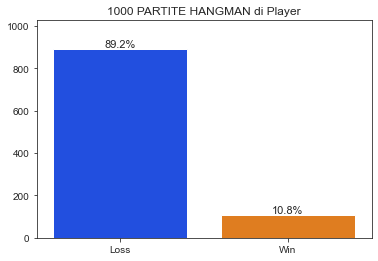

In [75]:
title= '1000 PARTITE HANGMAN di Player'
sns.set_style('ticks')
axes = sns.barplot(x=values, y=frequencies, palette='bright')
axes.set_title(title)
axes.set_ylim(top=max(frequencies)*1.15)
for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x()+bar.get_width()/2
    text_y=bar.get_height()
    text = f'{frequency/1000:.1%}'
    axes.text(text_x, text_y, text,
             fontsize=11,ha='center',va='bottom')
    

# Rappresentazione risultati di SmartPlayer

In [76]:
win_counter=0
loss_counter=0

for n in range(1000):
    
    h=Hangman(words, word_len=6, trials=8)
    player=SmartPlayer(h, words)
    result = player.play()    
    if '_' not in result:
        win_counter+=1
    else:
        loss_counter+=1       
    
values=['Loss','Win']
frequencies=[loss_counter,win_counter]
    

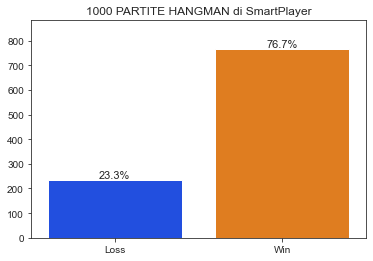

In [80]:
title= '1000 PARTITE HANGMAN di SmartPlayer'
sns.set_style('ticks')
axes = sns.barplot(x=values, y=frequencies, palette='bright')
axes.set_title(title)
axes.set_ylim(top=max(frequencies)*1.15)
for bar, frequency in zip(axes.patches, frequencies):
    text_x = bar.get_x()+bar.get_width()/2
    text_y=bar.get_height()
    text = f'{frequency/1000:.1%}'
    axes.text(text_x, text_y, text,
             fontsize=11,ha='center',va='bottom')